In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from numpy.random import normal
file_name = r"D:\Brainwired\FarmTestDataClean\live_label_merge_data\FinalMergedData28Hz_LiveLable.csv"

live_label_data = pd.read_csv(file_name)
live_label_data['tag']= 5
live_label_data.reset_index(drop=True,inplace=True)
print(live_label_data.shape)
print(live_label_data.date.unique())

(516880, 8)
['2024-07-03' '2024-07-04']


# Function Transformer
log transformer

reciprocal

sq root 

# power Transformer
box-cox 

yeo-johmson


# Log Trannsformer
it only applicable on positive values data and right skewed

it bring the your outlier point on the equal distance



Reciprocal 1/x: it convert the your small value in big value and voicevarsa
square (x**2) ; it applicable on the left skewed data
sqrt 

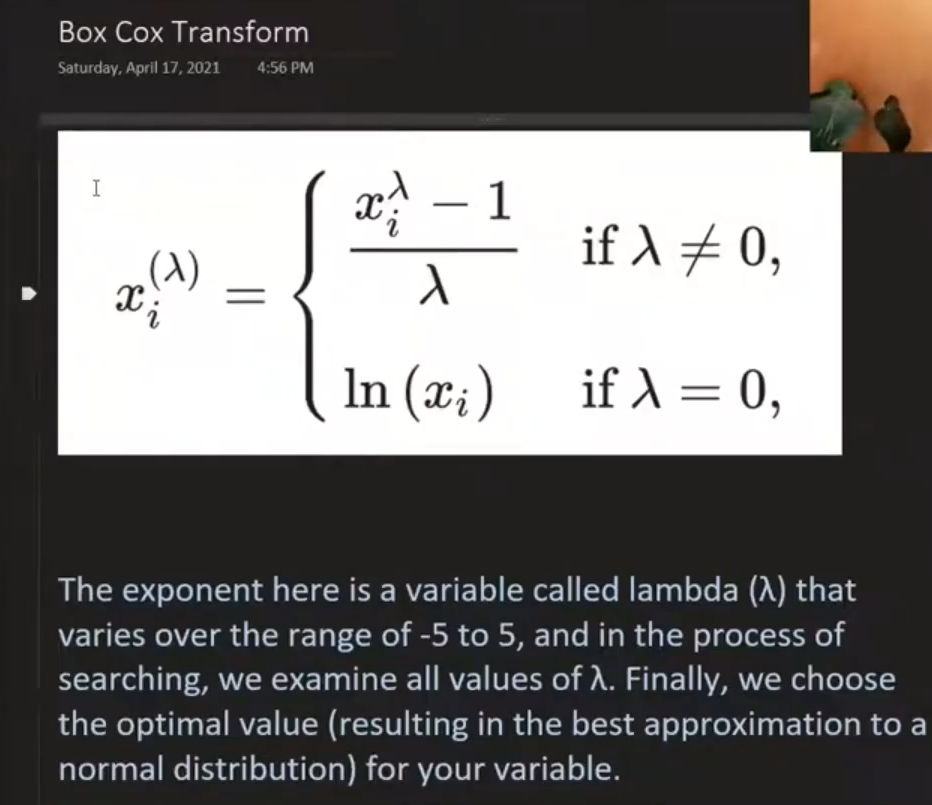

it is only applicable on positive value of data 

boxcox can not apply on neg and zero value data

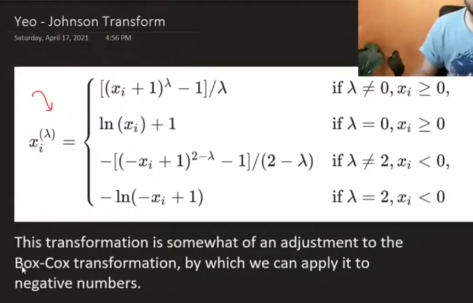

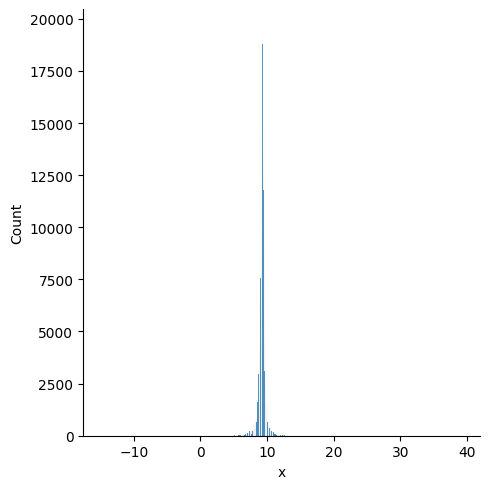

In [2]:
sns.displot(live_label_data['x'])

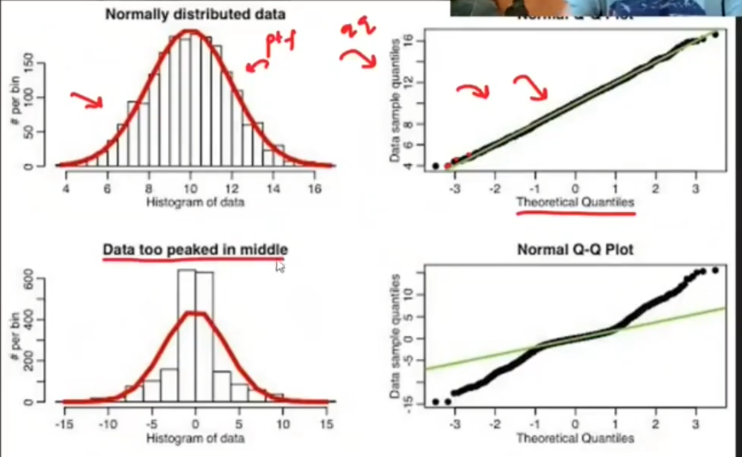
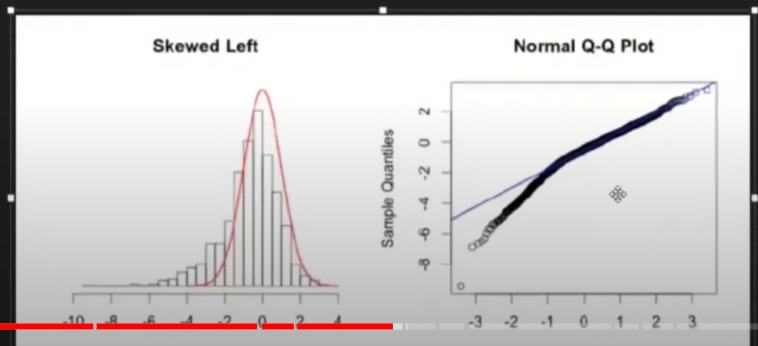
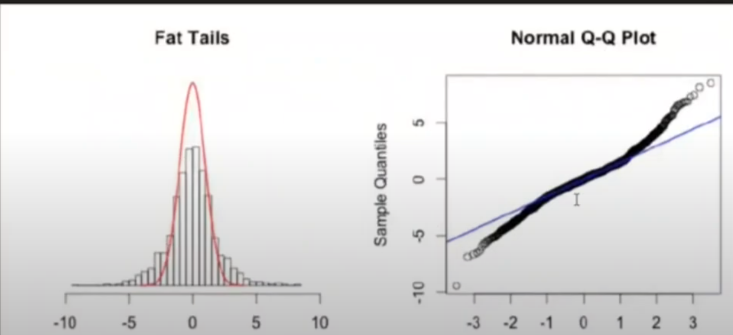

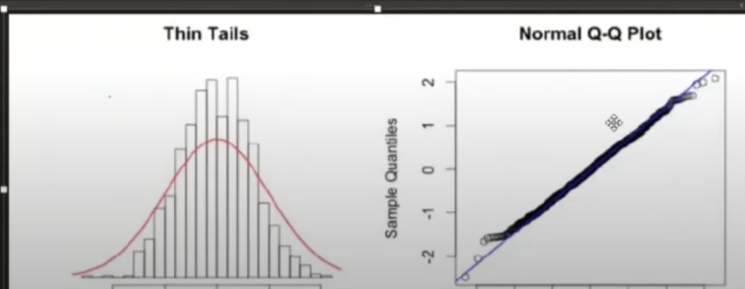

In [10]:
import statsmodels.api as  sm

sm.qqplot(live_label_data['x'],dist='norm',fit=True,)

AttributeError: 'str' object has no attribute 'fit'

# yeo-johnson transoformation

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data = live_label_data[['x','y','z','secondary']].copy()
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
y = LabelEncoder().fit_transform(y)
y


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, ..., 2, 2, 2])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


import scipy.stats as stats


C:\Users\BW_ML_1\AppData\Local\Temp\ipykernel_20124\3204942659.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])


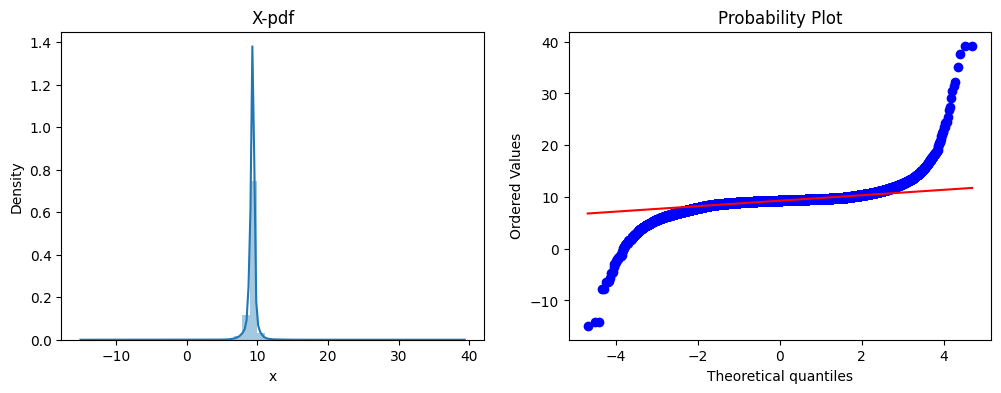

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(data['x'])
plt.title("X-pdf")

plt.subplot(122)
stats.probplot(data['x'],dist='norm',plot=plt)
plt.show()

In [31]:
# observation the data is too peak in the middle
# which does not follow the normal distribution

C:\Users\BW_ML_1\AppData\Local\Temp\ipykernel_20124\3918769803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y'])


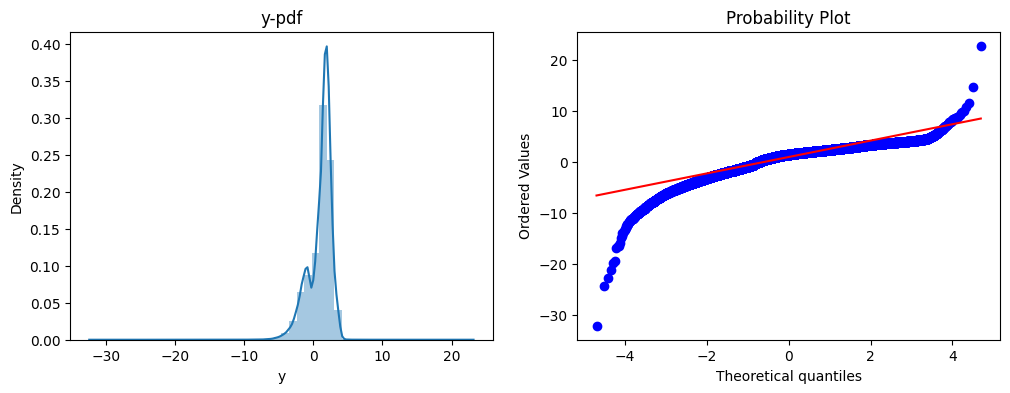

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(data['y'])
plt.title("y-pdf")

plt.subplot(122)
stats.probplot(data['y'],dist='norm',plot=plt)
plt.show()

In [ ]:
this is left skewed if we can apply the sq transoformation

C:\Users\BW_ML_1\AppData\Local\Temp\ipykernel_20124\3594133190.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['z'])


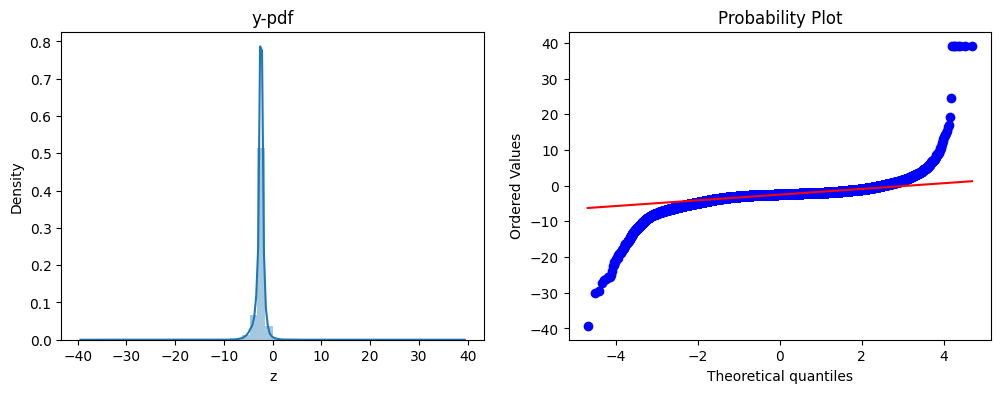

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(data['z'])
plt.title("y-pdf")

plt.subplot(122)
stats.probplot(data['z'],dist='norm',plot=plt)
plt.show()

In [34]:
# this is very too peaked in the middle 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


clf = LogisticRegression()
clf2 = DecisionTreeClassifier()



clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))



print("LR",np.mean(cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_train,y_train,scoring='accuracy',cv=10)))



Accuracy LR 0.8640883764123201
Accuracy DT 0.8368673579941186
LR 0.8644269481456082
DT 0.8358613248066507


# apply the transformation on your data

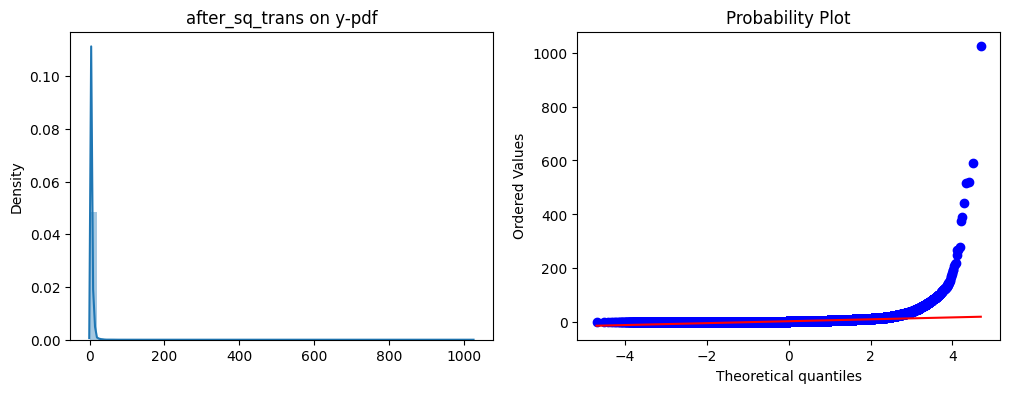

In [72]:
# we have y which left skeweed we try the sq transformation on y
from sklearn.preprocessing import FunctionTransformer

trf = FunctionTransformer(np.square)
y_data= trf.transform(data['y'].values)

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_data)
plt.title("after_sq_trans on y-pdf")

plt.subplot(122)
stats.probplot(y_data,dist='norm',plot=plt)
plt.show()

In [54]:
y_data.max()

1025.63265025

In [65]:
data['y'].min()

-32.0255

In [66]:
np.square(-32.0255)

1025.63265025

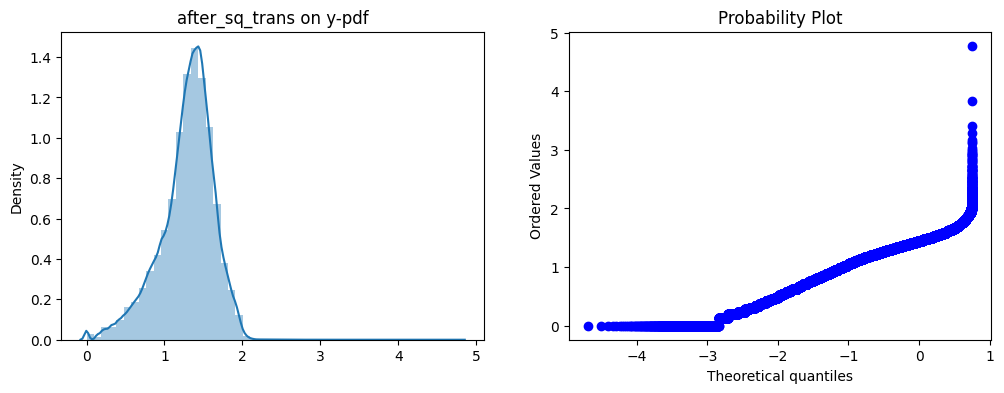

In [71]:
trf = FunctionTransformer(np.sqrt)
y_data= trf.transform(data['y'].values)

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_data)
plt.title("after_sq_trans on y-pdf")

plt.subplot(122)
stats.probplot(y_data,dist='norm',plot=plt)
plt.show()

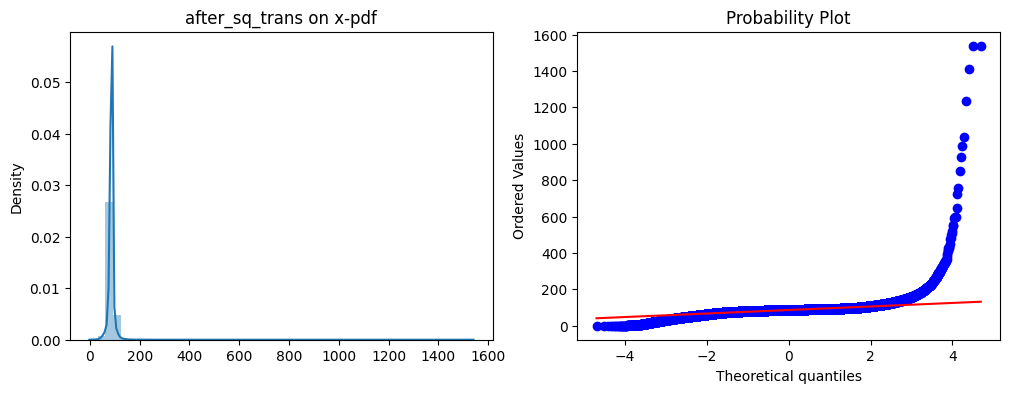

In [84]:
trf = FunctionTransformer(np.square)
y_data= trf.transform(data['x'].values)

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_data)
plt.title("after_sq_trans on x-pdf")

plt.subplot(122)
stats.probplot(y_data,dist='norm',plot=plt)
plt.show()

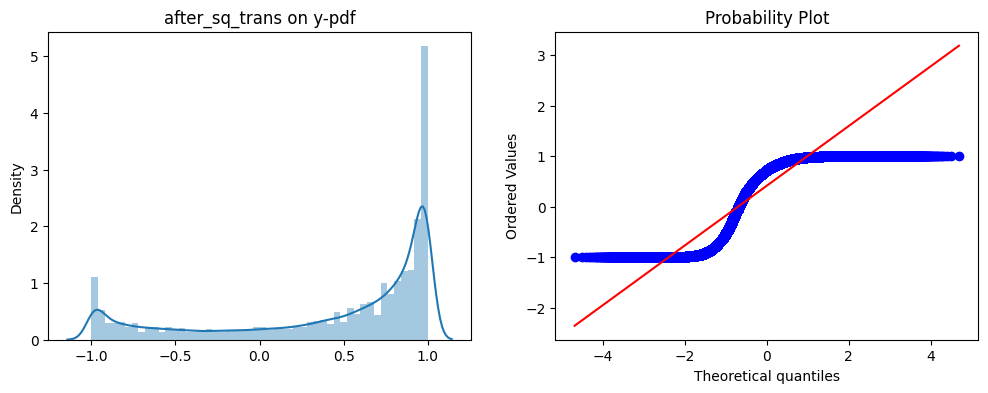

In [73]:
trf = FunctionTransformer(np.sin)
y_data= trf.transform(data['y'].values)

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_data)
plt.title("after_sq_trans on y-pdf")

plt.subplot(122)
stats.probplot(y_data,dist='norm',plot=plt)
plt.show()

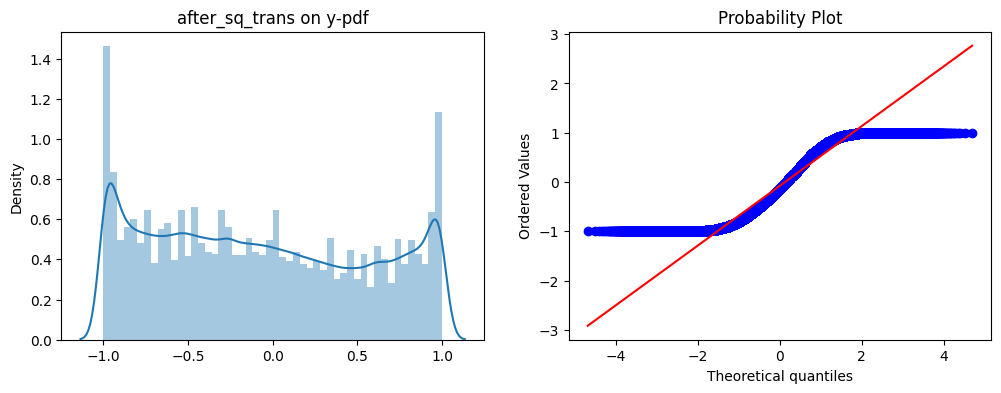

In [74]:
trf = FunctionTransformer(np.cos)
y_data= trf.transform(data['y'].values)

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_data)
plt.title("after_sq_trans on y-pdf")

plt.subplot(122)
stats.probplot(y_data,dist='norm',plot=plt)
plt.show()

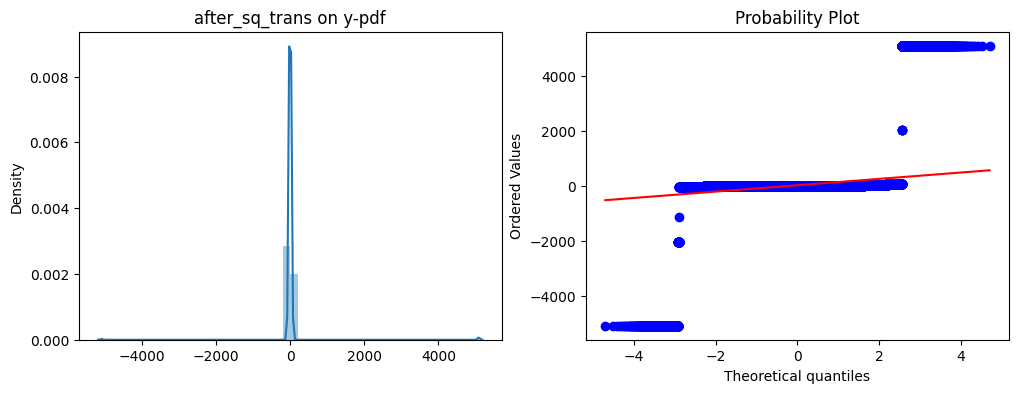

In [75]:
trf = FunctionTransformer(np.tan)
y_data= trf.transform(data['y'].values)

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(y_data)
plt.title("after_sq_trans on y-pdf")

plt.subplot(122)
stats.probplot(y_data,dist='norm',plot=plt)
plt.show()

# Apply the yeo-johnson transoformation

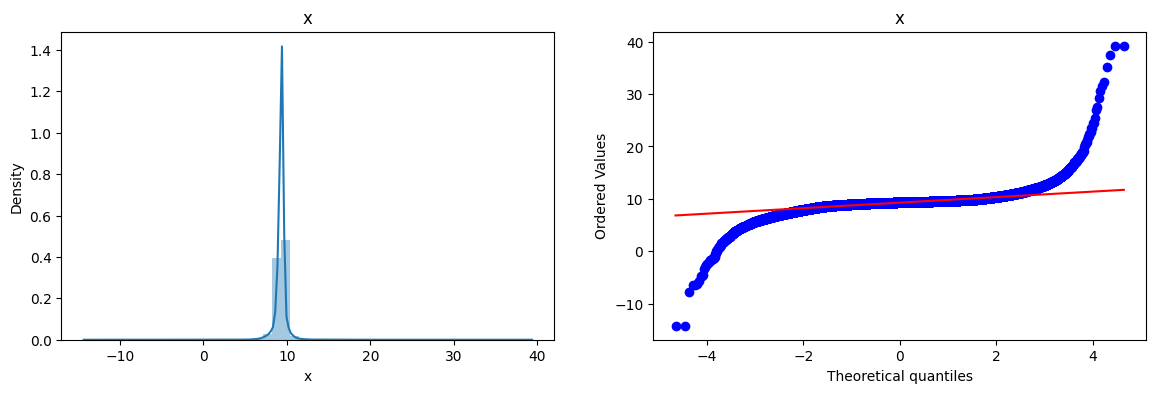

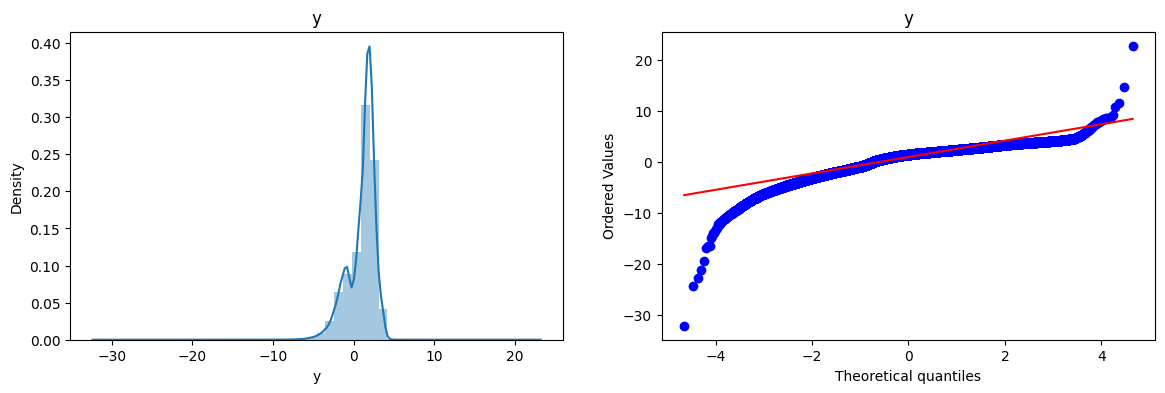

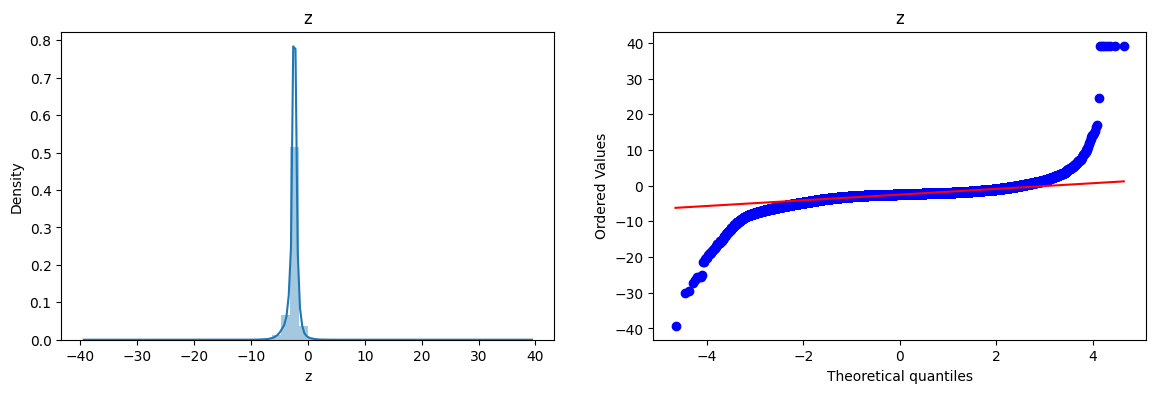

In [76]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


In [77]:
from sklearn.preprocessing import PowerTransformer

In [79]:
power_trans = PowerTransformer('yeo-johnson') # by default yeo-johnson and for box-cox PowerTransformer('box-cox)

trans_X_train = power_trans.fit_transform(X_train)



clf = LogisticRegression()
clf2 = DecisionTreeClassifier()



clf.fit(trans_X_train,y_train)
clf2.fit(trans_X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))



print("LR",np.mean(cross_val_score(clf,trans_X_train,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,trans_X_train,y_train,scoring='accuracy',cv=10)))



Accuracy LR 0.8406786875096735
Accuracy DT 0.7743480111437858
LR 0.8691620901278192
DT 0.8356315815437585


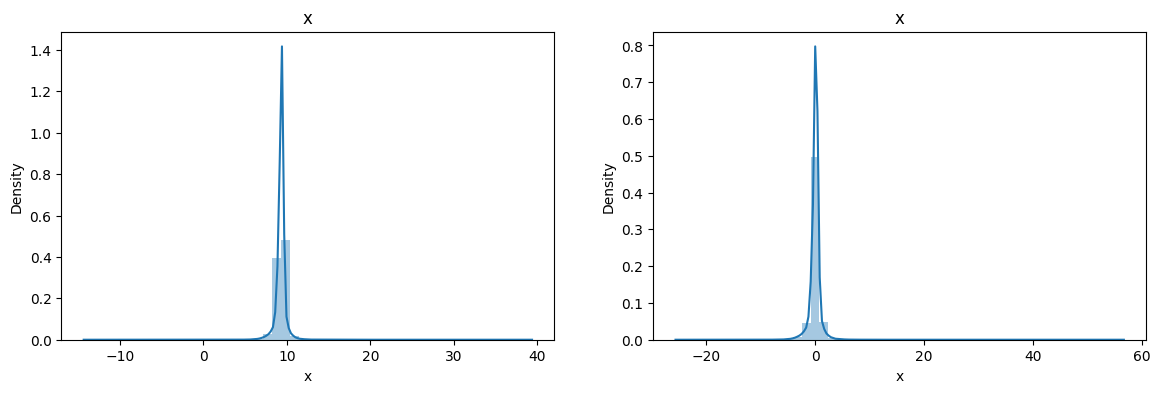

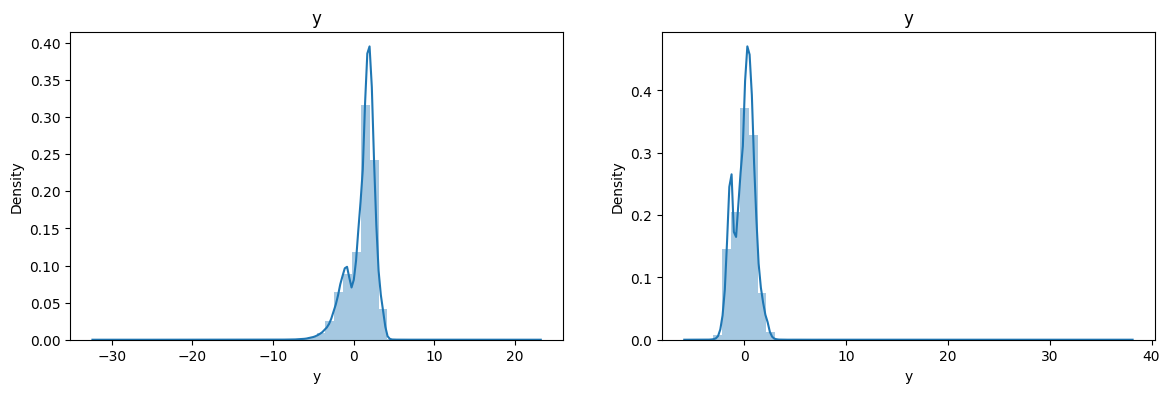

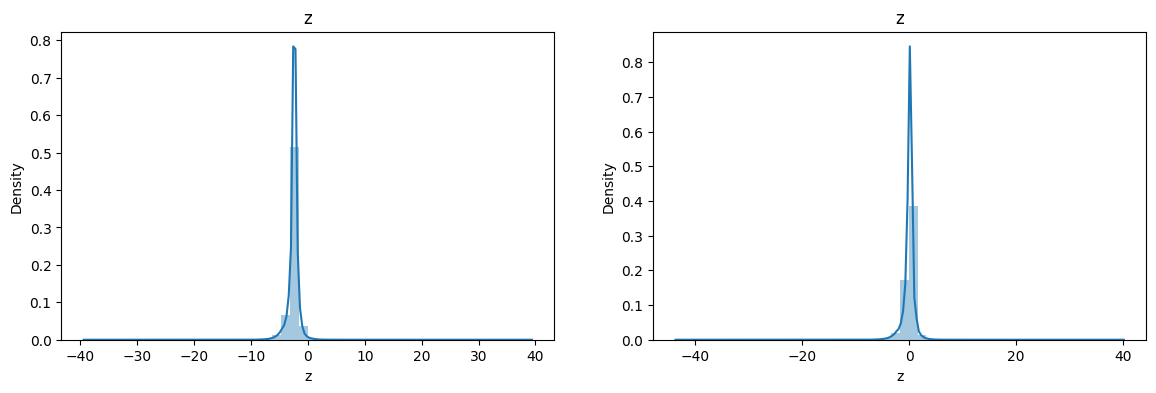

In [81]:

X_train_transformed = pd.DataFrame(trans_X_train,columns=X_train.columns)

for col in X_train_transformed.columns:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()



In [82]:
# observation after applying the yeo-johnson we did not found the major changes